In [ ]:
# 1. Select and Merge interested classes

Creating honda_civic_1998
Creating honda_accord_1997
Creating ford_f150_2006
Creating chevrolet_silverado_2004
Creating toyota_camry_2014
Creating nissan_altima_2014
Creating toyota_corolla_2013
Creating dodge_ram_2001
Creating gmc_sierra_2012
Creating chevrolet_impala_2008


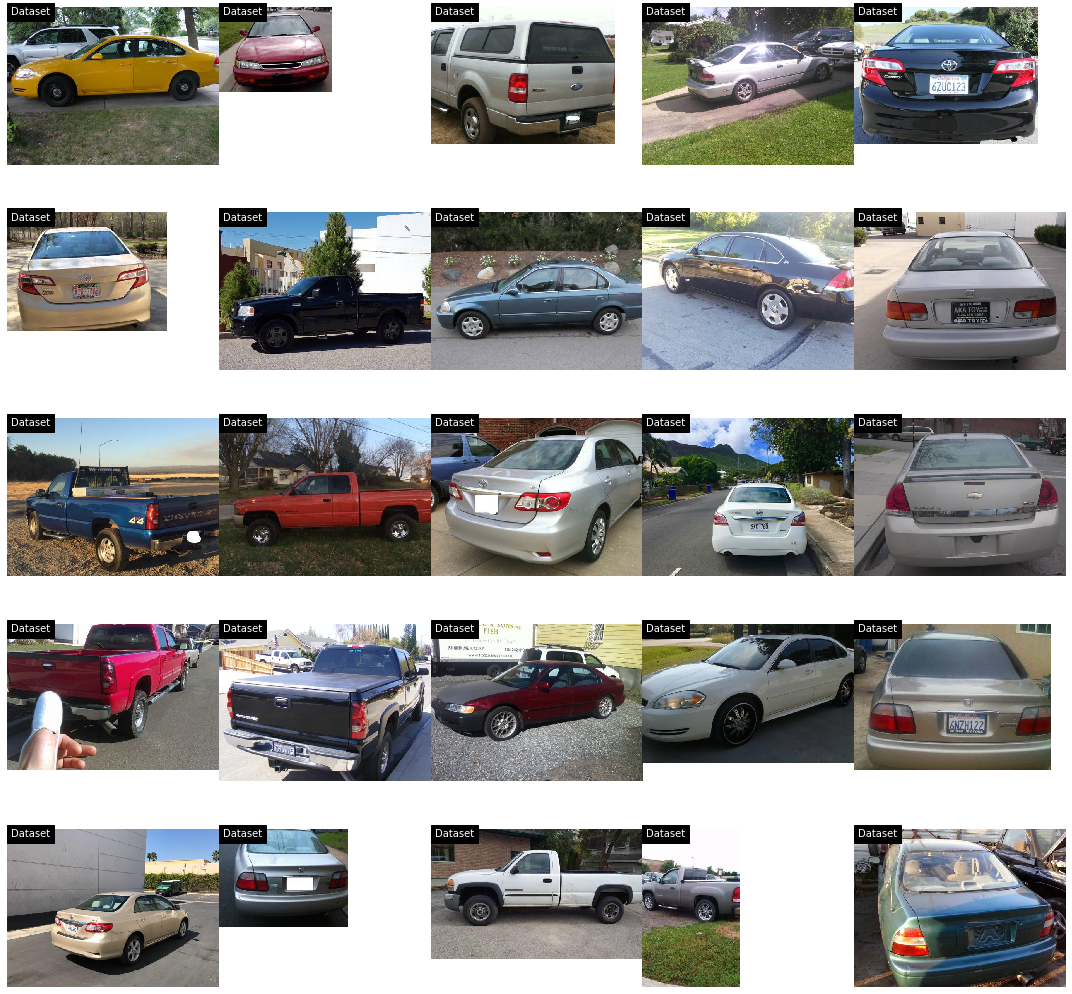

In [3]:
import os
import shutil
import glob
import vmmr_utils
import matplotlib.pyplot as plt
%matplotlib inline

cars = {
    "honda_civic_1998" : ["honda_civic_1997", "honda_civic_1998"],
    "honda_accord_1997" : ["honda_accord_1996", "honda_accord_1997"],
    "ford_f150_2006": ["ford_f150_2005", "ford_f150_2006", "ford_f150_2007"],
    "chevrolet_silverado_2004": ["chevrolet_silverado_2003", "chevrolet_silverado_2004"], # available "chevrolet_silverado_2005"
    "toyota_camry_2014": ["toyota_camry_2012", "toyota_camry_2013", "toyota_camry_2014", "toyota_camry_le_2012", "toyota_camry_le_2013", "toyota_camry_le_2014", "toyota_camry_se_2012", "toyota_camry_se_2013", "toyota_camry_xle_2012", "toyota_camry_xle_2013"],
    "nissan_altima_2014": ["nissan_altima_2013", "nissan_altima_2014", "nissan_altima_2015"],
    "toyota_corolla_2013": ["toyota_corolla_2011", "toyota_corolla_2012", "toyota_corolla_2013", "toyota_corolla_ce_2012", "toyota_corolla_le_2012", "toyota_corolla_le_2013", "toyota_corolla_s_2011", "toyota_corolla_s_2012"],
    "dodge_ram_2001": ["dodge_ram_1500_2000", "dodge_ram_1500_2001", "dodge_ram_1500_1999", "dodge_ram_1500_1998", "dodge_ram_1500_1997", "dodge_ram_1500_1996", "dodge_ram_1500_1995"],
    "gmc_sierra_2012": ["gmc_sierra_1500_2007", "gmc_sierra_1500_2008", "gmc_sierra_1500_2009", "gmc_sierra_1500_2010", "gmc_sierra_1500_2011", "gmc_sierra_1500_2012", "gmc_sierra_1500_2013", "gmc_sierra_2500_2007", "gmc_sierra_2500_2008", "gmc_sierra_2500_2009", "gmc_sierra_2500_2010", "gmc_sierra_2500_2011", "gmc_sierra_2500_2012", "gmc_sierra_2500_2013"],
    "chevrolet_impala_2008": ["chevrolet_impala_2007", "chevrolet_impala_2008", "chevrolet_impala_2009"]

}

full_dataset_path = "../Dataset/SubsetVMMR"
stolen_cars_path = "../Dataset/Most_Stolen_Cars"


if os.path.exists(stolen_cars_path):
    shutil.rmtree(stolen_cars_path)
else:
    os.makedirs(stolen_cars_path)
    

for directory, car_list in cars.items():
    print("Creating", directory)
    car_directory_name = os.path.join(stolen_cars_path, directory)
    os.makedirs(car_directory_name)
    for car in car_list:
        path = os.path.join(full_dataset_path, car, "")
        files = glob.glob(path + '*.jpg')
        for file in files:
            shutil.copy(file, car_directory_name)

vmmr_utils.display_images(stolen_cars_path)
    

In [4]:
#Remove invlid, corrupt and Non-jpg files

In [14]:
from multiprocessing import Pool

#check images
if __name__ == '_main_':
    poop = Pool()
    image_list = glob.glob(stolen_cats_path + "/*/*")
    pool.map(vmmr_utils.check_image, image_list)
    pool.close()
    
print("Done")

Done


In [15]:
#Distribution of selected classes

In [17]:
import pygal 
from IPython.display import display, HTML
#Create function to display interactive plotting
base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

def galplot(chart):
    rendered_chart = chart.render(is_unicode=True)
    plot_html = base_html.format(rendered_chart=rendered_chart)
    display(HTML(plot_html))
    
#Compare class distribution
line_chart = pygal.Bar(height=300)
line_chart.title = 'Stolen Car Class Distribution'
for o in os.listdir(stolen_cars_path):
    line_chart.add(o, len(os.listdir(os.path.join(stolen_cars_path, o))))
galplot(line_chart)

In [18]:
#Condfirm folder structure is correct

In [20]:
#confirm folder structure
for root, dirs, files in os.walk(stolen_cars_path):
    level = root.replace(os.getcwd(), '').count(os.sep)
    print('{0}{1}/'.format('    ' * level, os.path.basename(root)))
    
    for f in files[:2]:
        print('{0}{1}'.format('     ' * (level + 1), f))
    if level is not 0:
        print('{0}{1}'.format('     ' * (level + 1), "....."))

Most_Stolen_Cars/
    chevrolet_impala_2008/
          00000_8xV8B4TpKMW_600x450.jpg
          00101_7geWW6fvNQD_600x450.jpg
          .....
    chevrolet_silverado_2004/
          2003 1500 chevy silverado_00E0E_gcAlN1wRYXi_600x450.jpg
          2003 1500 chevy silverado_00L0L_7y62NcvCcsY_600x450.jpg
          .....
    dodge_ram_2001/
          1995 Dodge Ram 1500 Series_00B0B_edKEc6hVTw4_600x450.jpg
          1995 Dodge Ram 1500 Series_00H0H_1afjSkOKh4E_600x450.jpg
          .....
    ford_f150_2006/
          2005 F-150 Ford Crew Cab_00g0g_130pGW7DYor_600x450.jpg
          2005 F-150 Ford Crew Cab_00q0q_44k9khAOtOG_600x450.jpg
          .....
    gmc_sierra_2012/
          2007 Gm Sierra_00m0m_4i1UirplpqZ_600x450.jpg
          2007 Gm Sierra_00o0o_eB0mcdwxXQK_600x450.jpg
          .....
    honda_accord_1997/
          00000_5GwDIYYFadY_600x450.jpg
          00000_hvGK7QetNWt_600x450.jpg
          .....
    honda_civic_1998/
          00000_8tz5dxzg7te_600x450.jpg
          00000_e

In [21]:
#Create train, validation and test folders

In [26]:
import math
import re
import sys


#train and test set variables
train_val_test_ratio = (.7, .1, .2) # 70/10/20 data separation
test_folder = '../Dataset/test/'
train_folder = '../Dataset/train/'
val_folder = '../Dataset/val/'

file_names = os.listdir('../Dataset/Most_Stolen_Cars')

#remove existing folders if they exist
for folder in [test_folder, train_folder, val_folder]:
    if os.path.exists(folder)and os.path.isdir(folder):
        shutil.rmtree(folder)
        
#remake category folders in both train and test folders
for category in file_names:
    os.makedirs(test_folder + category)
    os.makedirs(train_folder + category)
    os.makedirs(val_folder + category)
    
#split data by train ratio and copy files to correct directory
for idx, category in enumerate(file_names):
    file_list = os.listdir(stolen_cars_path + '/' + category)
    
    train_ratio = math.floor(len(file_list) * train_val_test_ratio[0])
    val_ratio = math.floor(len(file_list) * train_val_test_ratio[1])
    train_list = file_list[:train_ratio]
    val_list = file_list[train_ratio:train_ratio + val_ratio]
    test_list = file_list[train_ratio + val_ratio :]
    
    
    for i, file in enumerate(train_list):
        shutil.copy(stolen_cars_path + '/' + category + '/' + file, train_folder + '/' + category + '/' + file)
    sys.stdout.write("Moving %s train images to category folder %s" %(len(train_list), category))
    sys.stdout.write('\n')
    for i, file in enumerate(val_list):
        shutil.copy(stolen_cars_path + '/' + category + '/' + file, val_folder + '/' + category + '/' + file)
    sys.stdout.write("Moving %s validation images to category folder %s" %(len(val_list), category))
    sys.stdout.write("\n")
    for i, file in enumerate(test_list):
        shutil.copy(stolen_cars_path + '/' + category + '/' + file, test_folder + '/' +category +'/' + file)
    sys.stdout.write("Moving %s test images to category folder %s" %(len(test_list), category))
    sys.stdout.write('\n')

Moving 612 train images to category folder chevrolet_impala_2008
Moving 87 validation images to category folder chevrolet_impala_2008
Moving 176 test images to category folder chevrolet_impala_2008
Moving 570 train images to category folder chevrolet_silverado_2004
Moving 81 validation images to category folder chevrolet_silverado_2004
Moving 164 test images to category folder chevrolet_silverado_2004
Moving 349 train images to category folder dodge_ram_2001
Moving 49 validation images to category folder dodge_ram_2001
Moving 101 test images to category folder dodge_ram_2001
Moving 615 train images to category folder ford_f150_2006
Moving 87 validation images to category folder ford_f150_2006
Moving 177 test images to category folder ford_f150_2006
Moving 298 train images to category folder gmc_sierra_2012
Moving 42 validation images to category folder gmc_sierra_2012
Moving 87 test images to category folder gmc_sierra_2012
Moving 452 train images to category folder honda_accord_1997
M

In [27]:
#Sample Augmentation

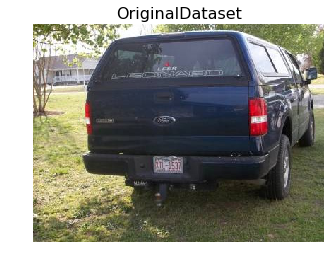

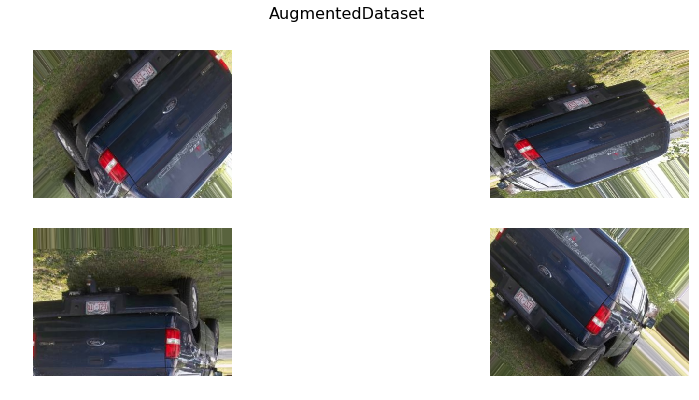

In [36]:
import random
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img




#select random image and follow next step
datagen = ImageDataGenerator(rotation_range = 45,
                            width_shift_range = 0.2,
                            height_shift_range = 0.2,
                            zoom_range = 0.3,
                            vertical_flip = True,
                            horizontal_flip = True,
                            fill_mode = "nearest")

#Load example image
file_list = glob.glob("../Dataset/test/*/*")
img_path = random.choice(file_list)
img = load_img(img_path)
car_class = img_path.split("/")[1]
plt.imshow(img)
plt.axis("off")
plt.title("Original" + car_class, fontsize = 16)

img = img_to_array(img)
img = img.reshape((1,) + img.shape)

#apply different augmentation techniques
n_augmentations = 4
plt.figure(figsize = (15, 6))
i = 0
for batch in datagen.flow(img, batch_size = 1, seed = 21):
    plt.subplot(2, int(np.ceil(n_augmentations * 1. / 2)), i + 1)
    plt.imshow(array_to_img(batch[0]))
    plt.axis("off")
    plt.suptitle("Augmented" + car_class, fontsize = 16)
    
    
    i+= 1
    if i >= n_augmentations:
        break

In [37]:
#Finalize augmented dataset for training

In [41]:
def data_augment(data_dir):
    list_of_images = os.listdir(data_dir)
    datagen = ImageDataGenerator(rotation_range = 45,
                                horizontal_flip = True,
                                fill_mode = "nearest")
    for img_name in list_of_images:
        tmp_img_name = os.path.join(data_dir, img_name)
        img = load_img(tmp_img_name)
        img = img_to_array(img)
        img = img.reshape((1, ) + img.shape)
        
        
        batch = datagen.flow(img,
                            batch_size = 1,
                            seed = 21,
                            save_to_dir = data_dir,
                            save_prefix = img_name.split(".jpg")[0] + "augmented",
                            save_format = "jpg")
        batch.next()
        
classes_to_augment = [
    "toyota_camry_2014",
    "nissan_altima_2014",
    "toyota_corolla_2013",
    "gmc_sierra_2012"
]


for class_names in classes_to_augment:
    print("Currently Augmenting :", class_names)
    data_dir = os.path.join(train_folder, class_names)
    data_augment(data_dir)

Currently Augmenting : toyota_camry_2014
Currently Augmenting : nissan_altima_2014
Currently Augmenting : toyota_corolla_2013
Currently Augmenting : gmc_sierra_2012


In [42]:
#resize images

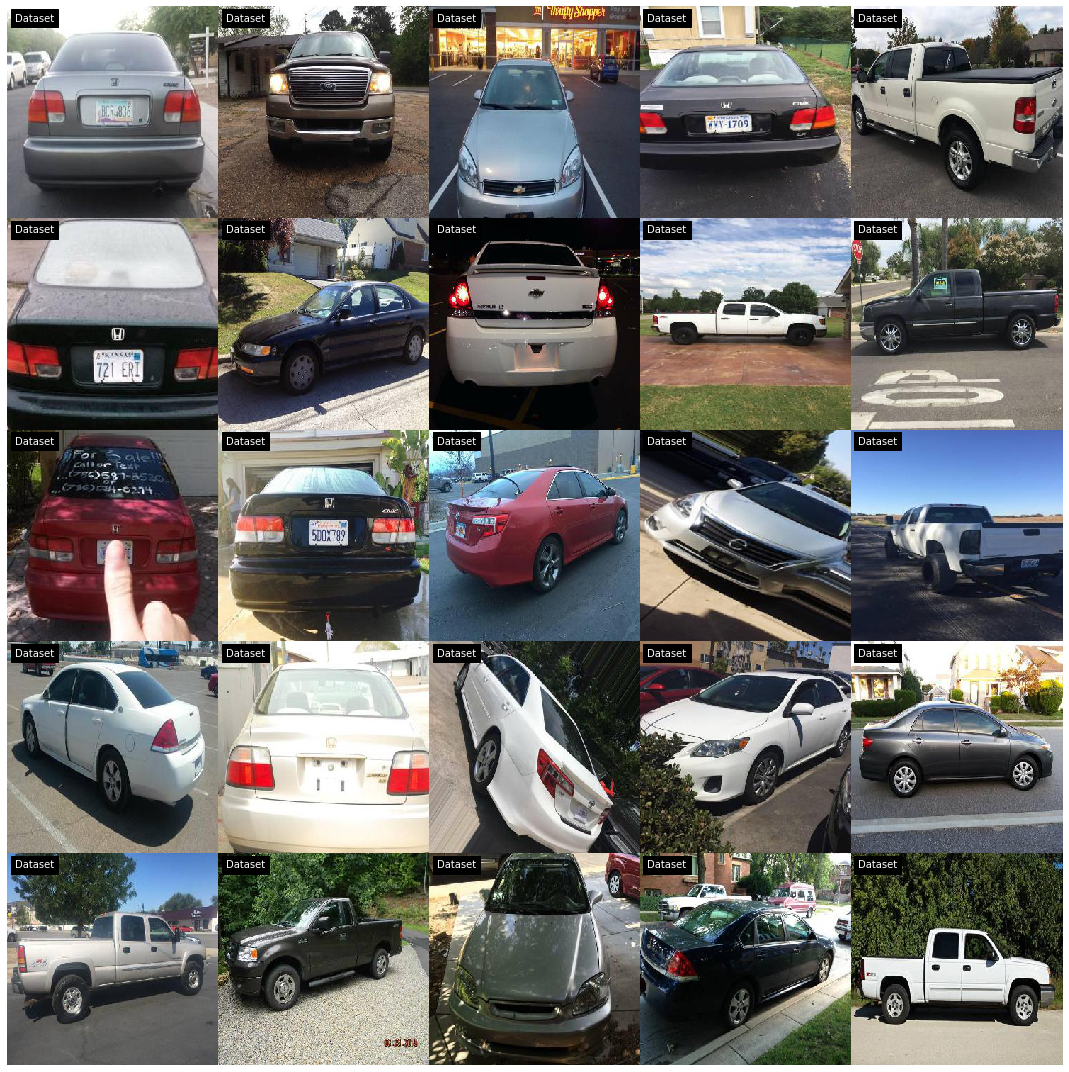

In [45]:
from functools import partial

#resize images
if __name__ == '__main__':
    pool = Pool()
    image_list = glob.glob(train_folder + "/*/*")
    func = partial(vmmr_utils.resize_image, size = 299)
    pool.map(func, image_list)
    pool.close()
    
vmmr_utils.display_images(train_folder)

In [46]:
#Look at distribution of selected classes again

In [48]:
#compare class distribution
line_chart = pygal.Bar(height = 300)
line_chart.title = "Most stolen car training class distribution"
for o in os.listdir(train_folder):
    line_chart.add(o, len(os.listdir(os.path.join(train_folder, o))))
galplot(line_chart) 